<a href="https://colab.research.google.com/github/kushagrasharma-13/Convolutional_Neural_Network/blob/main/CNN_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN on Fashion MNIST Data-set

Confusion Matrix

Classification Report

Accuracy

In [ ]:
import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, AveragePooling2D
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train = x_train.reshape(-1, 28,28, 1)
x_test = x_test.reshape(-1, 28,28, 1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
model = Sequential()
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train_one_hot, epochs=1)

1875/1875 [==============================] - 260s 138ms/step - loss: 0.4620 - accuracy: 0.8315


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (32, 26, 26, 128)         1280      
                                                                 
 activation_6 (Activation)   (32, 26, 26, 128)         0         
                                                                 
 average_pooling2d_4 (Averag  (32, 13, 13, 128)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (32, 11, 11, 128)         147584    
                                                                 
 activation_7 (Activation)   (32, 11, 11, 128)         0         
                                                                 
 average_pooling2d_5 (Averag  (32, 5, 5, 128)          0         
 ePooling2D)                                          

In [ ]:
history.history["accuracy"]

[0.8315333127975464]

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_acc)

313/313 [==============================] - 10s 32ms/step - loss: 0.3617 - accuracy: 0.8710
Test Loss:  0.361652135848999
Test Accuracy:  0.8709999918937683


313/313 [==============================] - 10s 32ms/step
Prediction:  Ankle Boot


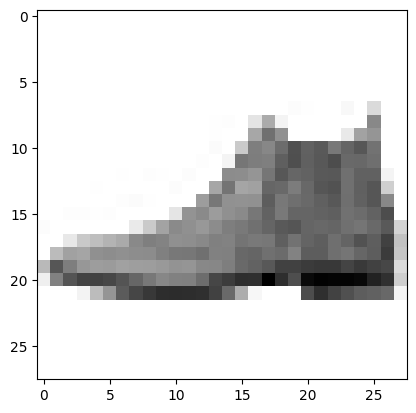

In [ ]:
ele = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
predictions = model.predict(x_test)
idx = np.argmax(np.round(predictions[0]))
print("Prediction: ",ele[idx])
plt.imshow(x_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

313/313 [==============================] - 10s 32ms/step


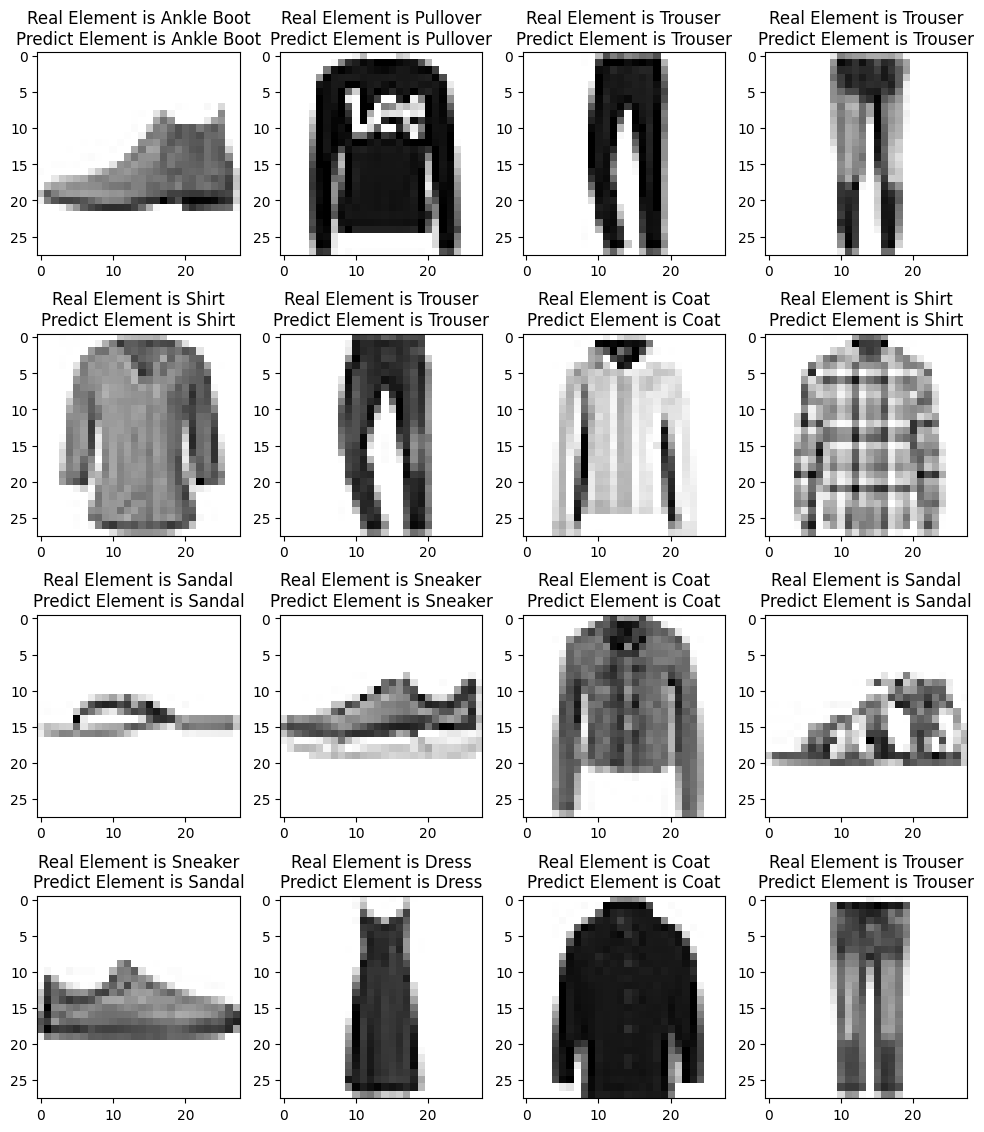

In [ ]:
y_pred = model.predict(x_test)
x_test_ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test_[i], cmap='binary')
    pred_ele = ele[y_pred[i].argmax()]
    actual_ele = ele[y_test_one_hot[i].argmax()]
    ax.set(title = f"Real Element is {actual_ele}\nPredict Element is {pred_ele}");

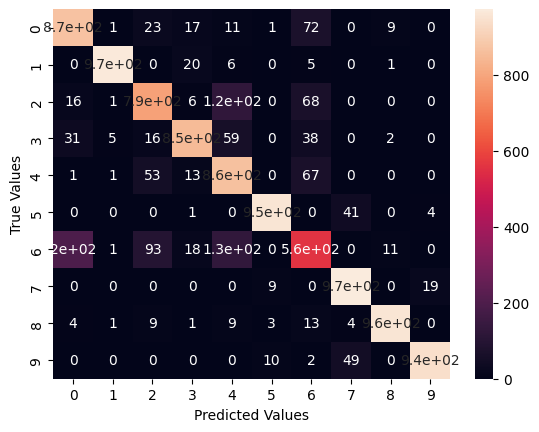

In [ ]:
y_pred = np.argmax(predictions, 1)
y_test = np.argmax(y_test_one_hot, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, )
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [ ]:
y_pred = np.argmax(predictions, 1)
y_test = np.argmax(y_test_one_hot, 1)
print(classification_report(y_test, y_pred, target_names = ele))

              precision    recall  f1-score   support

 T-shirt/top       0.78      0.87      0.82      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.79      0.79      1000
       Dress       0.92      0.85      0.88      1000
        Coat       0.72      0.86      0.79      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.68      0.56      0.61      1000
     Sneaker       0.91      0.97      0.94      1000
         Bag       0.98      0.96      0.97      1000
  Ankle Boot       0.98      0.94      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy: 87.10%
